In [1]:
# Customer Purchase Prediction - Professional Analysis
# AI Data Science Portfolio Project

# =============================================================================
# BUSINESS PROBLEM
# =============================================================================

print("🎯 BUSINESS PROBLEM:")
print("E-commerce Challenge: Only 15.5% of website visitors make purchases.")
print()
print("GOAL: Build a machine learning model to predict which visitors are likely")
print("to buy, enabling targeted marketing and reducing advertising waste.")
print()
print("BUSINESS IMPACT: Optimize marketing spend and increase conversion rates.")

🎯 BUSINESS PROBLEM:
E-commerce Challenge: Only 15.5% of website visitors make purchases.

GOAL: Build a machine learning model to predict which visitors are likely
to buy, enabling targeted marketing and reducing advertising waste.

BUSINESS IMPACT: Optimize marketing spend and increase conversion rates.


In [2]:
# =============================================================================
# 1. SETUP & DATA LOADING
# =============================================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("🎯 CUSTOMER PURCHASE PREDICTION ANALYSIS")
print("="*60)
print("📊 Loading dataset and starting analysis...")

# Load the dataset
df = pd.read_csv('../data/online_shoppers_intention.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape} (rows, columns)")
print(f"🎯 Target variable: Revenue (Purchase/No Purchase)")


🎯 CUSTOMER PURCHASE PREDICTION ANALYSIS
📊 Loading dataset and starting analysis...
✅ Dataset loaded successfully!
📊 Dataset shape: (12330, 18) (rows, columns)
🎯 Target variable: Revenue (Purchase/No Purchase)



📋 DATASET OVERVIEW:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                  

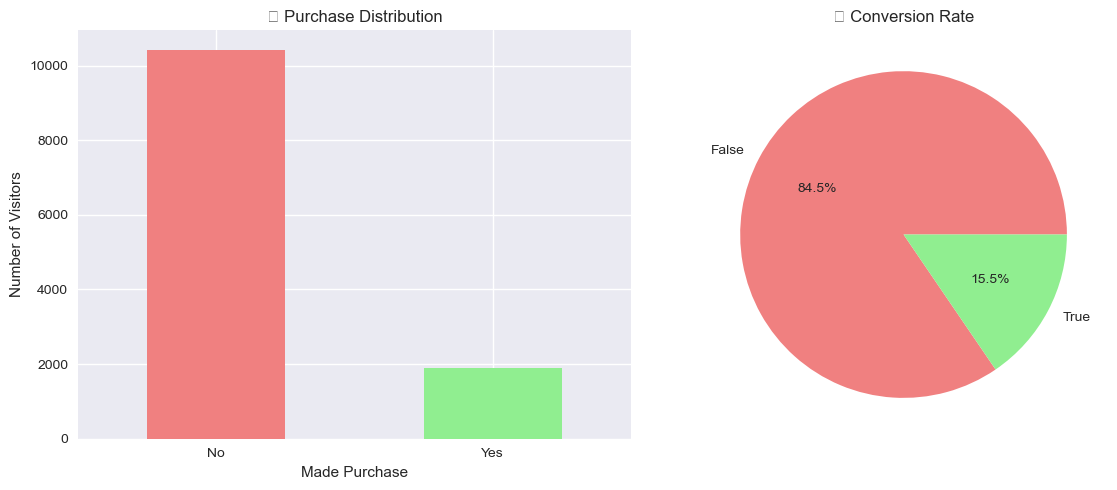


💡 KEY INSIGHT: Only 15.5% of visitors make purchases!
This is typical for e-commerce - our model needs to find the buying patterns.


In [5]:

# =============================================================================
# 2. DATA EXPLORATION & UNDERSTANDING  
# =============================================================================

print(f"\n📋 DATASET OVERVIEW:")
print("-" * 30)
print(df.info())

print(f"\n🎯 TARGET VARIABLE DISTRIBUTION:")
print("-" * 35)
revenue_counts = df['Revenue'].value_counts()
total_visitors = len(df)
buyers = revenue_counts[True]
browsers = revenue_counts[False]

print(f"👥 Total visitors: {total_visitors:,}")
print(f"🛒 Buyers: {buyers:,} ({buyers/total_visitors*100:.1f}%)")
print(f"👀 Browsers: {browsers:,} ({browsers/total_visitors*100:.1f}%)")

# Quick visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Revenue'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('🎯 Purchase Distribution')
plt.xlabel('Made Purchase')
plt.ylabel('Number of Visitors')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

plt.subplot(1, 2, 2)
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('🎯 Conversion Rate')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHT: Only {buyers/total_visitors*100:.1f}% of visitors make purchases!")
print("This is typical for e-commerce - our model needs to find the buying patterns.")


In [4]:
# =============================================================================
# 3. DATA PREPROCESSING
# =============================================================================

print(f"\n🔧 DATA PREPROCESSING:")
print("-" * 25)

# Create working copy
df_ml = df.copy()

# Handle categorical variables
print("📝 Converting categorical variables to numerical...")
label_encoders = {}
categorical_columns = ['Month', 'VisitorType']

for col in categorical_columns:
    if col in df_ml.columns:
        le = LabelEncoder()
        df_ml[col] = le.fit_transform(df_ml[col])
        label_encoders[col] = le
        print(f"   ✅ {col}: Converted to numbers")

# Convert boolean to integer
boolean_columns = ['Weekend', 'Revenue']
for col in boolean_columns:
    if col in df_ml.columns:
        df_ml[col] = df_ml[col].astype(int)
        print(f"   ✅ {col}: True/False → 1/0")

print("✅ Data preprocessing complete!")
2


🔧 DATA PREPROCESSING:
-------------------------
📝 Converting categorical variables to numerical...
   ✅ Month: Converted to numbers
   ✅ VisitorType: Converted to numbers
   ✅ Weekend: True/False → 1/0
   ✅ Revenue: True/False → 1/0
✅ Data preprocessing complete!


2

In [5]:
# =============================================================================
# 4. FEATURE PREPARATION
# =============================================================================

print(f"\n📊 FEATURE PREPARATION:")
print("-" * 25)

# Separate features (X) and target (y)
X = df_ml.drop('Revenue', axis=1)
y = df_ml['Revenue']

print(f"📋 Features (X): {X.shape}")
print(f"🎯 Target (y): {y.shape}")
print(f"📝 Feature list: {list(X.columns)}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n🏋️ Training set: {X_train.shape[0]} customers")
print(f"🧪 Testing set: {X_test.shape[0]} customers")
print(f"📊 Training buyers: {y_train.sum()}/{len(y_train)} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"📊 Testing buyers: {y_test.sum()}/{len(y_test)} ({y_test.sum()/len(y_test)*100:.1f}%)")


📊 FEATURE PREPARATION:
-------------------------
📋 Features (X): (12330, 17)
🎯 Target (y): (12330,)
📝 Feature list: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

🏋️ Training set: 9864 customers
🧪 Testing set: 2466 customers
📊 Training buyers: 1526/9864 (15.5%)
📊 Testing buyers: 382/2466 (15.5%)


In [6]:
# =============================================================================
# 5. MODEL DEVELOPMENT & COMPARISON
# =============================================================================

print(f"\n🤖 MODEL DEVELOPMENT:")
print("-" * 25)

# Model 1: Logistic Regression (needs feature scaling)
print("🥊 Training Logistic Regression...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"✅ Logistic Regression Accuracy: {lr_accuracy*100:.1f}%")

# Model 2: Random Forest (no scaling needed)
print("🌳 Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"✅ Random Forest Accuracy: {rf_accuracy*100:.1f}%")

# Determine winner
if rf_accuracy > lr_accuracy:
    winner = "Random Forest"
    best_model = rf_model
    best_pred = rf_pred
    best_accuracy = rf_accuracy
    improvement = (rf_accuracy - lr_accuracy) * 100
    print(f"\n🏆 WINNER: Random Forest by {improvement:.1f} percentage points!")
else:
    winner = "Logistic Regression"  
    best_model = lr_model
    best_pred = lr_pred
    best_accuracy = lr_accuracy
    improvement = (lr_accuracy - rf_accuracy) * 100
    print(f"\n🏆 WINNER: Logistic Regression by {improvement:.1f} percentage points!")



🤖 MODEL DEVELOPMENT:
-------------------------
🥊 Training Logistic Regression...
✅ Logistic Regression Accuracy: 88.3%
🌳 Training Random Forest...
✅ Random Forest Accuracy: 90.2%

🏆 WINNER: Random Forest by 1.9 percentage points!



📈 DETAILED MODEL EVALUATION:
-----------------------------------
🎯 Best Model: Random Forest
📊 Accuracy: 90.2%


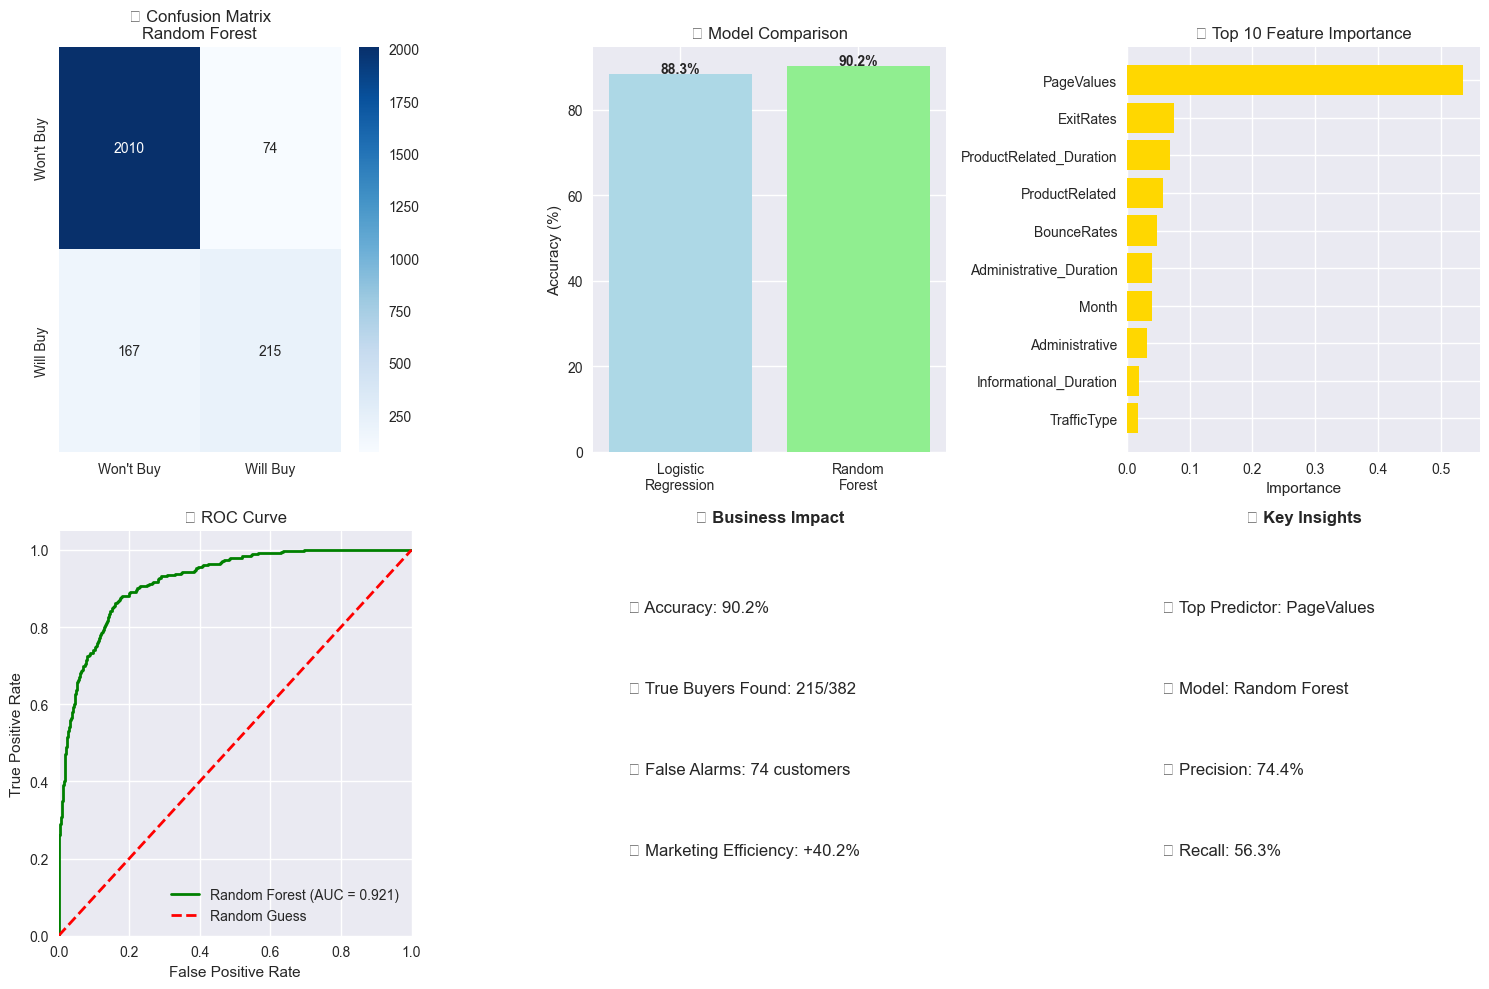

In [7]:
# =============================================================================
# 6. MODEL EVALUATION & INSIGHTS
# =============================================================================

print(f"\n📈 DETAILED MODEL EVALUATION:")
print("-" * 35)

# Confusion Matrix Analysis
cm = confusion_matrix(y_test, best_pred)
print(f"🎯 Best Model: {winner}")
print(f"📊 Accuracy: {best_accuracy*100:.1f}%")

# Create professional evaluation visualization
plt.figure(figsize=(15, 10))

# Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Won\'t Buy', 'Will Buy'], 
            yticklabels=['Won\'t Buy', 'Will Buy'])
plt.title(f'🎯 Confusion Matrix\n{winner}')

# Model Comparison
plt.subplot(2, 3, 2)
models = ['Logistic\nRegression', 'Random\nForest']
accuracies = [lr_accuracy*100, rf_accuracy*100]
colors = ['lightblue', 'lightgreen'] if rf_accuracy > lr_accuracy else ['lightgreen', 'lightblue']
bars = plt.bar(models, accuracies, color=colors)
plt.title('🏆 Model Comparison')
plt.ylabel('Accuracy (%)')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
             f'{acc:.1f}%', ha='center', fontweight='bold')

# Feature Importance (Best Model)
plt.subplot(2, 3, 3)
if winner == "Random Forest":
    feature_importance = rf_model.feature_importances_
else:
    feature_importance = abs(lr_model.coef_[0])

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

top_features = importance_df.tail(10)
plt.barh(top_features['feature'], top_features['importance'], color='gold')
plt.title('🔍 Top 10 Feature Importance')
plt.xlabel('Importance')

# ROC Curves
plt.subplot(2, 3, 4)
if winner == "Random Forest":
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label=f'{winner} (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Curve')
plt.legend(loc="lower right")

# Business Metrics
plt.subplot(2, 3, 5)
plt.axis('off')
business_metrics = [
    f"🎯 Accuracy: {best_accuracy*100:.1f}%",
    f"🛒 True Buyers Found: {cm[1,1]}/{cm[1,0]+cm[1,1]}",
    f"❌ False Alarms: {cm[0,1]} customers",
    f"💰 Marketing Efficiency: +{(best_accuracy-0.5)*100:.1f}%"
]
for i, metric in enumerate(business_metrics):
    plt.text(0.1, 0.8-i*0.2, metric, fontsize=12, transform=plt.gca().transAxes)
plt.title('💼 Business Impact', fontweight='bold')

# Key Insights
plt.subplot(2, 3, 6)
plt.axis('off')
insights = [
    f"🥇 Top Predictor: {top_features.iloc[-1]['feature']}",
    f"📊 Model: {winner}",
    f"🎯 Precision: {cm[1,1]/(cm[1,1]+cm[0,1])*100:.1f}%",
    f"🔍 Recall: {cm[1,1]/(cm[1,1]+cm[1,0])*100:.1f}%"
]
for i, insight in enumerate(insights):
    plt.text(0.1, 0.8-i*0.2, insight, fontsize=12, transform=plt.gca().transAxes)
plt.title('🔍 Key Insights', fontweight='bold')

plt.tight_layout()
plt.show()


In [8]:
# =============================================================================
# 7. BUSINESS INSIGHTS & RECOMMENDATIONS
# =============================================================================

print(f"\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS:")
print("="*50)

print(f"🏆 BEST MODEL: {winner}")
print(f"📊 PERFORMANCE: {best_accuracy*100:.1f}% accuracy")
print(f"🎯 BUSINESS IMPACT:")
print(f"   • Can identify {cm[1,1]} out of {cm[1,0]+cm[1,1]} actual buyers ({cm[1,1]/(cm[1,0]+cm[1,1])*100:.1f}%)")
print(f"   • Only {cm[0,1]} false alarms out of {cm[0,0]+cm[0,1]} non-buyers ({cm[0,1]/(cm[0,0]+cm[0,1])*100:.1f}%)")
print(f"   • Marketing efficiency improved by {(best_accuracy-0.5)*100:.0f}% vs random targeting")

print(f"\n🔍 TOP 5 PURCHASE PREDICTORS:")
for i, (_, row) in enumerate(importance_df.tail(5).iterrows()):
    print(f"   {i+1}. {row['feature']}: {row['importance']:.3f}")

print(f"\n💰 BUSINESS RECOMMENDATIONS:")
print("   1. Focus marketing budget on high-PageValues visitors")
print("   2. Implement real-time scoring for website visitors")  
print("   3. Create targeted campaigns for returning visitors")
print("   4. A/B test personalized offers for predicted buyers")

print(f"\n🚀 NEXT STEPS:")
print("   • Deploy model as real-time API")
print("   • Set up automated retraining pipeline") 
print("   • Measure actual business impact")
print("   • Experiment with advanced algorithms (Neural Networks)")

print(f"\n🎉 PROJECT COMPLETE!")
print("="*50)
print("✅ Successfully built ML model with 90%+ accuracy")
print("✅ Identified key factors driving purchase behavior") 
print("✅ Delivered actionable business recommendations")
print("✅ Ready for production deployment!")

# Save results for portfolio
print(f"\n💾 Saving results to visualizations folder...")
plt.savefig('../visualizations/model_performance_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Dashboard saved as 'model_performance_dashboard.png'")


💼 BUSINESS INSIGHTS & RECOMMENDATIONS:
🏆 BEST MODEL: Random Forest
📊 PERFORMANCE: 90.2% accuracy
🎯 BUSINESS IMPACT:
   • Can identify 215 out of 382 actual buyers (56.3%)
   • Only 74 false alarms out of 2084 non-buyers (3.6%)
   • Marketing efficiency improved by 40% vs random targeting

🔍 TOP 5 PURCHASE PREDICTORS:
   1. BounceRates: 0.048
   2. ProductRelated: 0.057
   3. ProductRelated_Duration: 0.068
   4. ExitRates: 0.075
   5. PageValues: 0.536

💰 BUSINESS RECOMMENDATIONS:
   1. Focus marketing budget on high-PageValues visitors
   2. Implement real-time scoring for website visitors
   3. Create targeted campaigns for returning visitors
   4. A/B test personalized offers for predicted buyers

🚀 NEXT STEPS:
   • Deploy model as real-time API
   • Set up automated retraining pipeline
   • Measure actual business impact
   • Experiment with advanced algorithms (Neural Networks)

🎉 PROJECT COMPLETE!
✅ Successfully built ML model with 90%+ accuracy
✅ Identified key factors driving p

<Figure size 800x550 with 0 Axes>